In [11]:
import keras 
from  keras.datasets import mnist
import numpy as np
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [13]:
X_train = np.reshape(X_train,(60000,784))
X_test = np.reshape(X_test,(10000,784))
X_train = X_train/255
Y_test = Y_test/255
print("Shape of Train Data: {}".format(X_TRAIN.shape))
print("Shape of Train Data: {}".format(X_TEST.shape))

Shape of Train Data: (60000, 784)
Shape of Train Data: (10000, 784)


In [15]:
encoding_dim = 32  
from keras.models import Model
from keras.layers import Input, Dense
input_img = Input(shape=(784,))


encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)


autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [16]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [17]:
autoencoder.fit(X_train,X_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test,X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.2010 - val_loss: 0.1411
Epoch 2/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.1306 - val_loss: 0.1211
Epoch 3/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.1178 - val_loss: 0.1125
Epoch 4/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.1105 - val_loss: 0.1062
Epoch 5/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.1061 - val_loss: 0.1030
Epoch 6/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.1032 - val_loss: 0.1007
Epoch 7/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.1008 - val_loss: 0.0986
Epoch 8/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.0987 - val_loss: 0.0966
Epoch 9/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0970 - val_loss: 0.0954
Epoch

TEST DATA AS INPUT:


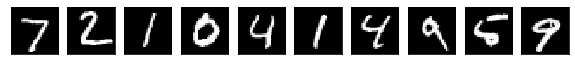

Reconstructed Image:


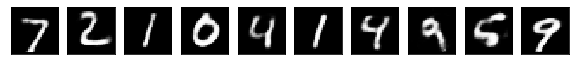

In [18]:
import matplotlib.pyplot as plt
encoded_imgs = autoencoder.predict(X_test)
n = 10  # how many digits we will display
print("TEST DATA AS INPUT:")
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
print("Reconstructed Image:")

plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()